## Cle Elum Ridge (CER) Treatment Manuscript Scripts 
## `5_cdf_by_canopycover` 
### Created the cdfs by baf and canopy cover for manuscript figures 

* Making a copy of `7_cdfs_by_canopycover_b` from repo `CER_raster_analysis` and cleaning up the code here 

created by Cassie Lumbrazo\
last updated: Sept 2024\
run location: locally\
python environment: **rasterio_scalebar**

In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

import geopandas as gpd
# from rasterio.warp import calculate_default_transform, reproject, Resampling
# import rioxarray
# import rasterio
# import rasterstats
import scipy

In [2]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [3]:
# The two netcdfs created in the previous notebook, one has some correction for negative snow depth values and the other has the snow depth values cut at zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_cutatzero.nc') # for the snow depth values cut a zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_negtozero.nc') # for the snow depth values negative to zeros
# ds.close() # how to close a dataset 

ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_raster_analysis\\rapid_model_cleandata_create_netcdf_negtozero_v3_b.nc') 
ds

<xarray.Dataset>
Dimensions:                           (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                                 (x) float64 4.65e+05 ... 4.676e+05
  * y                                 (y) float64 2.111e+05 ... 2.097e+05
  * band                              (band) int32 1
    spatial_ref                       int32 ...
Data variables: (12/339)
    chmws_rapid                       (band, y, x) float32 ...
    dce_rapid                         (band, y, x) float32 ...
    giulia_dce_rapid                  (band, y, x) float32 ...
    giulia_dce_ncalm                  (band, y, x) float32 ...
    baf_old                           (band, y, x) float32 ...
    baf_new                           (band, y, x) float32 ...
    ...                                ...
    hs_rapid_baf_new_100s_n           (band, y, x) float32 ...
    hs_rapid_baf_new_30s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_60s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_80s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_90s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_100s_s           (band, y, x) float32 ...

## Constants and Calculations to Run before any other sections

In [4]:
colorpre='darkslategray'
colorpos='royalblue'
# colorpos='mediumvioletred'

colorsouth = 'darkorange'
colornorth = 'darkblue'

In [5]:
# First, just snow depth by DCE
# ds['hs_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 100) # forest
# ds['hs_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 200)
# ds['hs_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 300)
# ds['hs_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 400)
# ds['hs_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['dce_ncalm_reclass'] == 500) # large gaps

ds['hs_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 100) # forest
ds['hs_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 200)
ds['hs_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 300)
ds['hs_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 400)
ds['hs_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['dce_snowoff_reclass'] == 500) # large gaps

ds['hs_dce_rapid_reclass_100'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 100) # forest
ds['hs_dce_rapid_reclass_200'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 200)
ds['hs_dce_rapid_reclass_300'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 300)
ds['hs_dce_rapid_reclass_400'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 400)
ds['hs_dce_rapid_reclass_500'] = ds['hs_rapid'].where(ds['dce_rapid_reclass'] == 500) # large gaps

In [6]:
# First, just snow depth by DCE
ds['hs_giulia_dce_ncalm_reclass_100'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 100) # forest
ds['hs_giulia_dce_ncalm_reclass_200'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 200)
ds['hs_giulia_dce_ncalm_reclass_300'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 300)
ds['hs_giulia_dce_ncalm_reclass_400'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 400)
ds['hs_giulia_dce_ncalm_reclass_500'] = ds['hs_ncalm'].where(ds['giulia_dce_snowoff_reclass'] == 500) # large gaps

ds['hs_giulia_dce_rapid_reclass_100'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 100) # forest
ds['hs_giulia_dce_rapid_reclass_200'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 200)
ds['hs_giulia_dce_rapid_reclass_300'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 300)
ds['hs_giulia_dce_rapid_reclass_400'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 400)
ds['hs_giulia_dce_rapid_reclass_500'] = ds['hs_rapid'].where(ds['giulia_dce_rapid_reclass'] == 500) # large gaps

In [7]:
# and, the same thing, but by aspect (side of the ridge)
ds['hs_dce_rapid_reclass_100_n'] = ds['hs_dce_rapid_reclass_100'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_200_n'] = ds['hs_dce_rapid_reclass_200'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_300_n'] = ds['hs_dce_rapid_reclass_300'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_400_n'] = ds['hs_dce_rapid_reclass_400'].where(ds['baf_ridge'] == -1)
ds['hs_dce_rapid_reclass_500_n'] = ds['hs_dce_rapid_reclass_500'].where(ds['baf_ridge'] == -1)

ds['hs_dce_rapid_reclass_100_s'] = ds['hs_dce_rapid_reclass_100'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_200_s'] = ds['hs_dce_rapid_reclass_200'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_300_s'] = ds['hs_dce_rapid_reclass_300'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_400_s'] = ds['hs_dce_rapid_reclass_400'].where(ds['baf_ridge'] ==  1)
ds['hs_dce_rapid_reclass_500_s'] = ds['hs_dce_rapid_reclass_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_dce_rapid_reclass_100_n_dah'] = ds['hs_dce_rapid_reclass_100'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_200_n_dah'] = ds['hs_dce_rapid_reclass_200'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_300_n_dah'] = ds['hs_dce_rapid_reclass_300'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_400_n_dah'] = ds['hs_dce_rapid_reclass_400'].where(ds['dah_binary'] == -1)
ds['hs_dce_rapid_reclass_500_n_dah'] = ds['hs_dce_rapid_reclass_500'].where(ds['dah_binary'] == -1)

ds['hs_dce_rapid_reclass_100_s_dah'] = ds['hs_dce_rapid_reclass_100'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_200_s_dah'] = ds['hs_dce_rapid_reclass_200'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_300_s_dah'] = ds['hs_dce_rapid_reclass_300'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_400_s_dah'] = ds['hs_dce_rapid_reclass_400'].where(ds['dah_binary'] ==  1)
ds['hs_dce_rapid_reclass_500_s_dah'] = ds['hs_dce_rapid_reclass_500'].where(ds['dah_binary'] ==  1)

In [8]:
# and, the same thing, but by aspect (side of the ridge)
ds['hs_giulia_dce_rapid_reclass_100_n'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_200_n'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_300_n'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_400_n'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['baf_ridge'] == -1)
ds['hs_giulia_dce_rapid_reclass_500_n'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['baf_ridge'] == -1)

ds['hs_giulia_dce_rapid_reclass_100_s'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_200_s'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_300_s'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_400_s'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['baf_ridge'] ==  1)
ds['hs_giulia_dce_rapid_reclass_500_s'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['baf_ridge'] ==  1)

# and, the same thing, but by aspect (determined by DAH)
ds['hs_giulia_dce_rapid_reclass_100_n_dah'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_200_n_dah'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_300_n_dah'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_400_n_dah'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['dah_binary'] == -1)
ds['hs_giulia_dce_rapid_reclass_500_n_dah'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['dah_binary'] == -1)

ds['hs_giulia_dce_rapid_reclass_100_s_dah'] = ds['hs_giulia_dce_rapid_reclass_100'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_200_s_dah'] = ds['hs_giulia_dce_rapid_reclass_200'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_300_s_dah'] = ds['hs_giulia_dce_rapid_reclass_300'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_400_s_dah'] = ds['hs_giulia_dce_rapid_reclass_400'].where(ds['dah_binary'] ==  1)
ds['hs_giulia_dce_rapid_reclass_500_s_dah'] = ds['hs_giulia_dce_rapid_reclass_500'].where(ds['dah_binary'] ==  1)

## CDFS

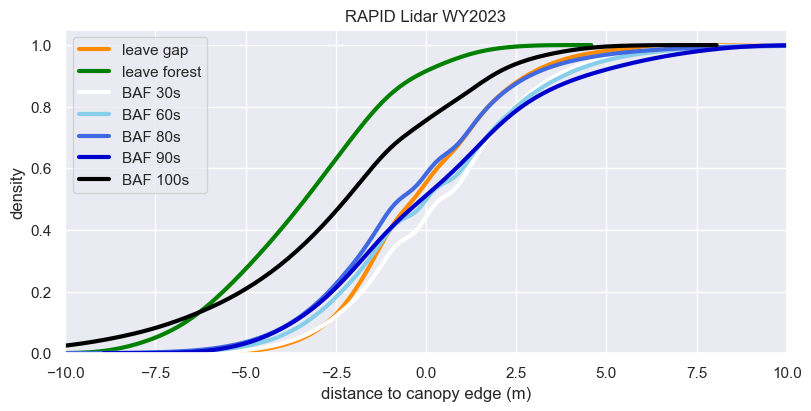

In [9]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(8,4), constrained_layout = True)

# plots 

# adjust plot size 
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_30s'].values.flatten(), color='white', label='BAF 30s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_60s'].values.flatten(), color='skyblue', label='BAF 60s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_80s'].values.flatten(), color='royalblue', label='BAF 80s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_90s'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_100s'].values.flatten(), color='black', label='BAF 100s', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023')
plt.xlabel('distance to canopy edge (m)')
plt.ylabel('density')
plt.xlim(-10,10)

plt.legend()
plt.show()

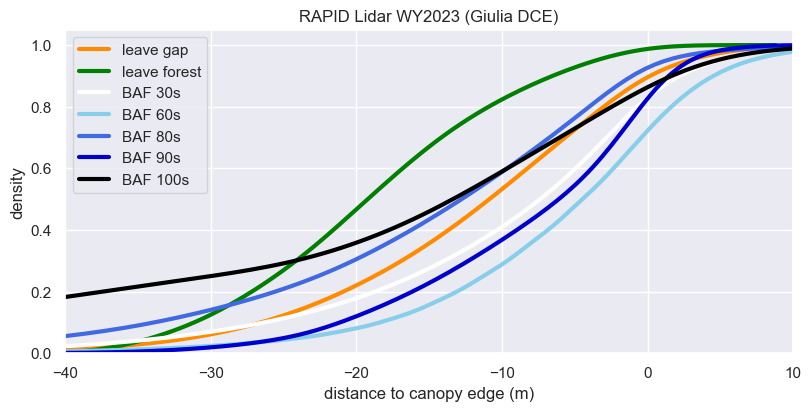

In [10]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(8,4), constrained_layout = True)

# plots 

# adjust plot size 
sns.kdeplot(ds['giulia_dce_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)

sns.kdeplot(ds['giulia_dce_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['giulia_dce_rapid_baf_new_30s'].values.flatten(), color='white', label='BAF 30s', cumulative=True, linewidth=3)

sns.kdeplot(ds['giulia_dce_rapid_baf_new_60s'].values.flatten(), color='skyblue', label='BAF 60s', cumulative=True, linewidth=3)

sns.kdeplot(ds['giulia_dce_rapid_baf_new_80s'].values.flatten(), color='royalblue', label='BAF 80s', cumulative=True, linewidth=3)

sns.kdeplot(ds['giulia_dce_rapid_baf_new_90s'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['giulia_dce_rapid_baf_new_100s'].values.flatten(), color='black', label='BAF 100s', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023 (Giulia DCE)')
plt.xlabel('distance to canopy edge (m)')
plt.ylabel('density')
plt.xlim(-40,10)

plt.legend()
plt.show()

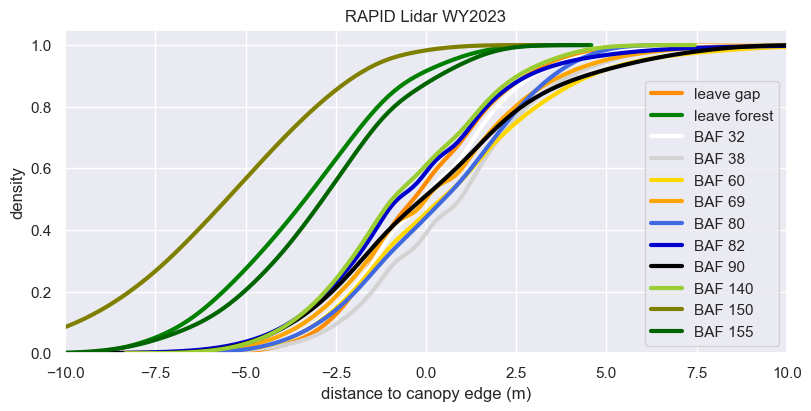

In [11]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(8,4), constrained_layout = True)

# plots 

# adjust plot size 
sns.kdeplot(ds['dce_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_32'].values.flatten(), color='white', label='BAF 32', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_38'].values.flatten(), color='lightgrey', label='BAF 38', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_60'].values.flatten(), color='gold', label='BAF 60', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_69'].values.flatten(), color='orange', label='BAF 69', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_80'].values.flatten(), color='royalblue', label='BAF 80', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_82'].values.flatten(), color='mediumblue', label='BAF 82', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_90'].values.flatten(), color='black', label='BAF 90', cumulative=True, linewidth=3)
# sns.kdeplot(ds['dce_rapid_baf_new_92'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['dce_rapid_baf_new_140'].values.flatten(), color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_150'].values.flatten(), color='olive', label='BAF 150', cumulative=True, linewidth=3)
sns.kdeplot(ds['dce_rapid_baf_new_155'].values.flatten(), color='darkgreen', label='BAF 155', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023')
plt.xlabel('distance to canopy edge (m)')
plt.ylabel('density')
plt.xlim(-10,10)

plt.legend()
plt.show()

In [ ]:
ds['dce_rapid_baf_new_17']

## Now, we just want to add one which is CDFs of DCE split by aspect

In [46]:
# mkae a north and a south version of all the dce_rapid_baf variables 
ds['dce_rapid_baf_new_1_s'] = ds['dce_rapid_baf_new_1'].where(ds['baf_ridge'] == 1) # leave gap, no BAF
ds['dce_rapid_baf_new_2_s'] = ds['dce_rapid_baf_new_2'].where(ds['baf_ridge'] == 1) # leave forest, no BAF
ds['dce_rapid_baf_new_17_s'] = ds['dce_rapid_baf_new_17'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_30_s'] = ds['dce_rapid_baf_new_30'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_60_s'] = ds['dce_rapid_baf_new_60'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_69_s'] = ds['dce_rapid_baf_new_69'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_80_s'] = ds['dce_rapid_baf_new_80'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_90_s'] = ds['dce_rapid_baf_new_90'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_140_s'] = ds['dce_rapid_baf_new_140'].where(ds['baf_ridge'] == 1)
ds['dce_rapid_baf_new_155_s'] = ds['dce_rapid_baf_new_155'].where(ds['baf_ridge'] == 1)

# make a north and a south version of all the dce_rapid_baf variables
ds['dce_rapid_baf_new_1_n'] = ds['dce_rapid_baf_new_1'].where(ds['baf_ridge'] == -1) # leave gap, no BAF
# ds['dce_rapid_baf_new_2_n'] = ds['dce_rapid_baf_new_2'].where(ds['baf_ridge'] == -1) # leave forest, no BAF 
ds['dce_rapid_baf_new_32_n'] = ds['dce_rapid_baf_new_32'].where(ds['baf_ridge'] == -1)
ds['dce_rapid_baf_new_38_n'] = ds['dce_rapid_baf_new_38'].where(ds['baf_ridge'] == -1)
ds['dce_rapid_baf_new_60_n'] = ds['dce_rapid_baf_new_60'].where(ds['baf_ridge'] == -1)
ds['dce_rapid_baf_new_82_n'] = ds['dce_rapid_baf_new_82'].where(ds['baf_ridge'] == -1)
ds['dce_rapid_baf_new_140_n'] = ds['dce_rapid_baf_new_140'].where(ds['baf_ridge'] == -1)
ds['dce_rapid_baf_new_150_n'] = ds['dce_rapid_baf_new_150'].where(ds['baf_ridge'] == -1) # leave forest, need to check the difference between 2 and 150 I think they are the same thing 
ds['dce_rapid_baf_new_155_n'] = ds['dce_rapid_baf_new_155'].where(ds['baf_ridge'] == -1)


C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\40927849.py:28: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['dce_rapid_baf_new_155_n'].values.flatten(), ax=axes[1], color='olive', label=f'BAF 155, n={np.unique(ds["dce_rapid_baf_new_155_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')


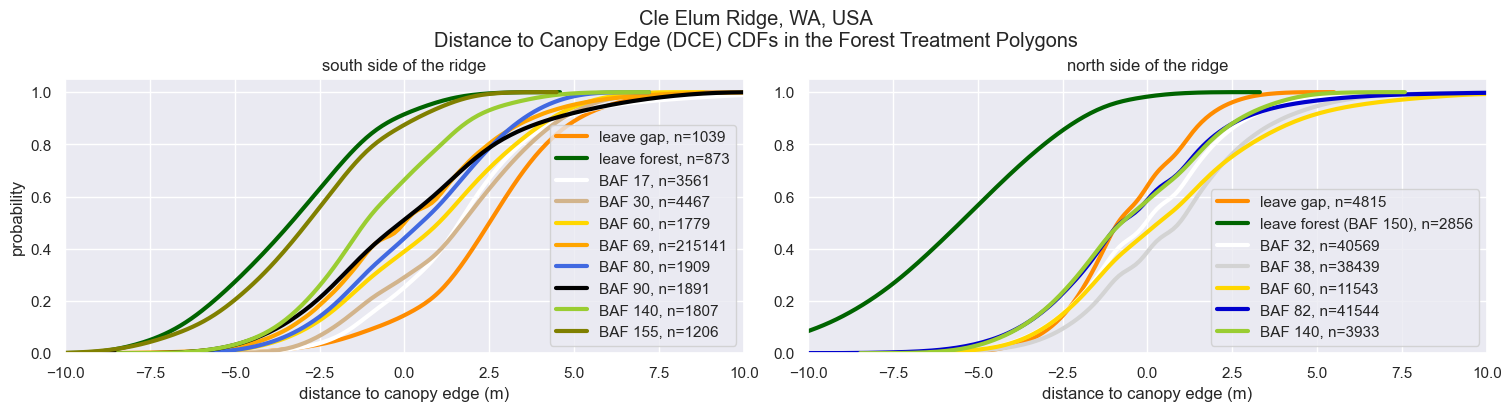

In [54]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
# SOUTH
sns.kdeplot(ds['dce_rapid_baf_new_1_s'].values.flatten(), ax=axes[0], color='darkorange', label=f'leave gap, n={np.unique(ds["dce_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_2_s'].values.flatten(), ax=axes[0], color='darkgreen', label=f'leave forest, n={np.unique(ds["dce_rapid_baf_new_2_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_17_s'].values.flatten(), ax=axes[0], color='white', label=f'BAF 17, n={np.unique(ds["dce_rapid_baf_new_17_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_30_s'].values.flatten(), ax=axes[0], color='tan', label=f'BAF 30, n={np.unique(ds["dce_rapid_baf_new_30_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_60_s'].values.flatten(), ax=axes[0], color='gold', label=f'BAF 60, n={np.unique(ds["dce_rapid_baf_new_60_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_69_s'].values.flatten(), ax=axes[0], color='orange', label=f'BAF 69, n={np.unique(ds["dce_rapid_baf_new_69_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_80_s'].values.flatten(), ax=axes[0], color='royalblue', label=f'BAF 80, n={np.unique(ds["dce_rapid_baf_new_80_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_90_s'].values.flatten(), ax=axes[0], color='black', label=f'BAF 90, n={np.unique(ds["dce_rapid_baf_new_90_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_140_s'].values.flatten(), ax=axes[0], color='yellowgreen', label=f'BAF 140, n={np.unique(ds["dce_rapid_baf_new_140_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_155_s'].values.flatten(), ax=axes[0], color='olive', label=f'BAF 155, n={np.unique(ds["dce_rapid_baf_new_155_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# NORTH
sns.kdeplot(ds['dce_rapid_baf_new_1_n'].values.flatten(), ax=axes[1], color='darkorange', label=f'leave gap, n={np.unique(ds["dce_rapid_baf_new_1_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_150_n'].values.flatten(), ax=axes[1], color='darkgreen', label=f'leave forest (BAF 150), n={np.unique(ds["dce_rapid_baf_new_150_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['dce_rapid_baf_new_32_n'].values.flatten(), ax=axes[1], color='white', label=f'BAF 32, n={np.unique(ds["dce_rapid_baf_new_32_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_38_n'].values.flatten(), ax=axes[1], color='lightgrey', label=f'BAF 38, n={np.unique(ds["dce_rapid_baf_new_38_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_60_n'].values.flatten(), ax=axes[1], color='gold', label=f'BAF 60, n={np.unique(ds["dce_rapid_baf_new_60_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_82_n'].values.flatten(), ax=axes[1], color='mediumblue', label=f'BAF 82, n={np.unique(ds["dce_rapid_baf_new_82_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_140_n'].values.flatten(), ax=axes[1], color='yellowgreen', label=f'BAF 140, n={np.unique(ds["dce_rapid_baf_new_140_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_155_n'].values.flatten(), ax=axes[1], color='olive', label=f'BAF 155, n={np.unique(ds["dce_rapid_baf_new_155_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# labels
axes[0].set_title('south side of the ridge')
axes[1].set_title('north side of the ridge')

axes[0].set_xlabel('distance to canopy edge (m)')
axes[1].set_xlabel('distance to canopy edge (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-10, 10)

plt.suptitle('Cle Elum Ridge, WA, USA\nDistance to Canopy Edge (DCE) CDFs in the Forest Treatment Polygons')
axes[0].legend()
axes[1].legend()

plt.show()

## Now, put this together as a subplot with the snow depth CDFs too

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\3810793483.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['dce_rapid_baf_new_155_n'].values.flatten(), ax=axes[0,1], color='olive', label=f'BAF 155, n={np.unique(ds["dce_rapid_baf_new_155_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\3810793483.py:56: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['hs_rapid_baf_new_69_n'].values.flatten(), ax=axes[1,1], color='orange', label=f'BAF 69, n={np.unique(ds["hs_rapid_baf_new_69_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\3810793483.py:59: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['hs_rapid_baf_new

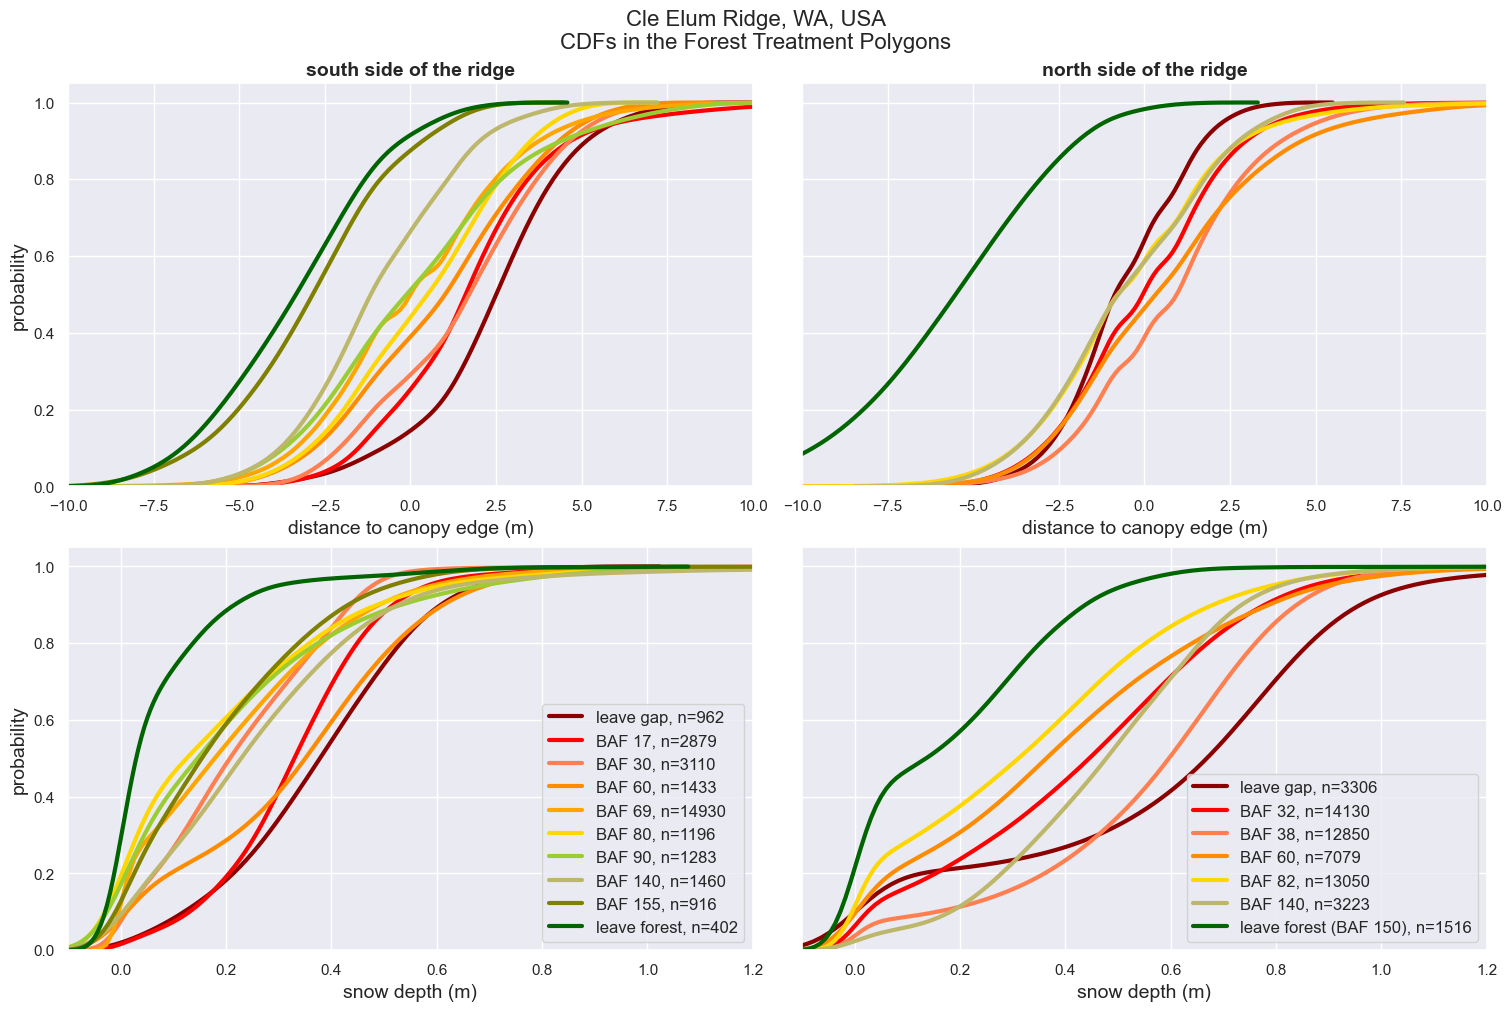

In [59]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(2, 2, sharex='row', sharey=True, figsize=(15,10), constrained_layout = True)
alpha=0.7

# DISTANCE TO CANOPY EDGE ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# SOUTH
sns.kdeplot(ds['dce_rapid_baf_new_1_s'].values.flatten(), ax=axes[0,0], color='darkred', label=f'leave gap, n={np.unique(ds["dce_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['dce_rapid_baf_new_17_s'].values.flatten(), ax=axes[0,0], color='red', label=f'BAF 17, n={np.unique(ds["dce_rapid_baf_new_17_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_30_s'].values.flatten(), ax=axes[0,0], color='coral', label=f'BAF 30, n={np.unique(ds["dce_rapid_baf_new_30_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_60_s'].values.flatten(), ax=axes[0,0], color='darkorange', label=f'BAF 60, n={np.unique(ds["dce_rapid_baf_new_60_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_69_s'].values.flatten(), ax=axes[0,0], color='orange', label=f'BAF 69, n={np.unique(ds["dce_rapid_baf_new_69_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_80_s'].values.flatten(), ax=axes[0,0], color='gold', label=f'BAF 80, n={np.unique(ds["dce_rapid_baf_new_80_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_90_s'].values.flatten(), ax=axes[0,0], color='yellowgreen', label=f'BAF 90, n={np.unique(ds["dce_rapid_baf_new_90_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_140_s'].values.flatten(), ax=axes[0,0], color='darkkhaki', label=f'BAF 140, n={np.unique(ds["dce_rapid_baf_new_140_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_155_s'].values.flatten(), ax=axes[0,0], color='olive', label=f'BAF 155, n={np.unique(ds["dce_rapid_baf_new_155_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['dce_rapid_baf_new_2_s'].values.flatten(), ax=axes[0,0], color='darkgreen', label=f'leave forest, n={np.unique(ds["dce_rapid_baf_new_2_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# NORTH
sns.kdeplot(ds['dce_rapid_baf_new_1_n'].values.flatten(), ax=axes[0,1], color='darkred', label=f'leave gap, n={np.unique(ds["dce_rapid_baf_new_1_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['dce_rapid_baf_new_32_n'].values.flatten(), ax=axes[0,1], color='red', label=f'BAF 32, n={np.unique(ds["dce_rapid_baf_new_32_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_38_n'].values.flatten(), ax=axes[0,1], color='coral', label=f'BAF 38, n={np.unique(ds["dce_rapid_baf_new_38_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_60_n'].values.flatten(), ax=axes[0,1], color='darkorange', label=f'BAF 60, n={np.unique(ds["dce_rapid_baf_new_60_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_82_n'].values.flatten(), ax=axes[0,1], color='gold', label=f'BAF 82, n={np.unique(ds["dce_rapid_baf_new_82_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_140_n'].values.flatten(), ax=axes[0,1], color='darkkhaki', label=f'BAF 140, n={np.unique(ds["dce_rapid_baf_new_140_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['dce_rapid_baf_new_155_n'].values.flatten(), ax=axes[0,1], color='olive', label=f'BAF 155, n={np.unique(ds["dce_rapid_baf_new_155_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['dce_rapid_baf_new_150_n'].values.flatten(), ax=axes[0,1], color='darkgreen', label=f'leave forest (BAF 150), n={np.unique(ds["dce_rapid_baf_new_150_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# SNOW DEPTH -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# SOUTH
sns.kdeplot(ds['hs_rapid_baf_new_1_s'].values.flatten(), ax=axes[1,0], color='darkred', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_17_s'].values.flatten(), ax=axes[1,0], color='red', label=f'BAF 17, n={np.unique(ds["hs_rapid_baf_new_17_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_30_s'].values.flatten(), ax=axes[1,0], color='coral', label=f'BAF 30, n={np.unique(ds["hs_rapid_baf_new_30_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_60_s'].values.flatten(), ax=axes[1,0], color='darkorange', label=f'BAF 60, n={np.unique(ds["hs_rapid_baf_new_60_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_s'].values.flatten(), ax=axes[1,0], color='orange', label=f'BAF 69, n={np.unique(ds["hs_rapid_baf_new_69_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_80_s'].values.flatten(), ax=axes[1,0], color='gold', label=f'BAF 80, n={np.unique(ds["hs_rapid_baf_new_80_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_90_s'].values.flatten(), ax=axes[1,0], color='yellowgreen', label=f'BAF 90, n={np.unique(ds["hs_rapid_baf_new_90_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_140_s'].values.flatten(), ax=axes[1,0], color='darkkhaki', label=f'BAF 140, n={np.unique(ds["hs_rapid_baf_new_140_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_s'].values.flatten(), ax=axes[1,0], color='olive', label=f'BAF 155, n={np.unique(ds["hs_rapid_baf_new_155_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_2_s'].values.flatten(), ax=axes[1,0], color='darkgreen', label=f'leave forest, n={np.unique(ds["hs_rapid_baf_new_2_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# NORTH
sns.kdeplot(ds['hs_rapid_baf_new_1_n'].values.flatten(), ax=axes[1,1], color='darkred', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_32_n'].values.flatten(), ax=axes[1,1], color='red', label=f'BAF 32, n={np.unique(ds["hs_rapid_baf_new_32_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_n'].values.flatten(), ax=axes[1,1], color='coral', label=f'BAF 38, n={np.unique(ds["hs_rapid_baf_new_38_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_60_n'].values.flatten(), ax=axes[1,1], color='darkorange', label=f'BAF 60, n={np.unique(ds["hs_rapid_baf_new_60_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_n'].values.flatten(), ax=axes[1,1], color='orange', label=f'BAF 69, n={np.unique(ds["hs_rapid_baf_new_69_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_n'].values.flatten(), ax=axes[1,1], color='gold', label=f'BAF 82, n={np.unique(ds["hs_rapid_baf_new_82_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_140_n'].values.flatten(), ax=axes[1,1], color='darkkhaki', label=f'BAF 140, n={np.unique(ds["hs_rapid_baf_new_140_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_n'].values.flatten(), ax=axes[1,1], color='olive', label=f'BAF 155, n={np.unique(ds["hs_rapid_baf_new_155_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_150_n'].values.flatten(), ax=axes[1,1], color='darkgreen', label=f'leave forest (BAF 150), n={np.unique(ds["hs_rapid_baf_new_150_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')



# labels
axes[0,0].set_title('south side of the ridge', fontsize=14, fontweight='bold')
axes[0,1].set_title('north side of the ridge', fontsize=14, fontweight='bold')

axes[0,0].set_xlabel('distance to canopy edge (m)', fontsize=14)
axes[0,1].set_xlabel('distance to canopy edge (m)', fontsize=14)

axes[1,0].set_xlabel('snow depth (m)', fontsize=14)
axes[1,1].set_xlabel('snow depth (m)', fontsize=14)

axes[0,0].set_ylabel('probability', fontsize=14)
axes[0,1].set_ylabel('')

axes[1,0].set_ylabel('probability', fontsize=14)
axes[1,1].set_ylabel('')

axes[0,0].set_xlim(-10,10) # dce xlim
axes[1,0].set_xlim(-0.1,1.2) # snow depth xlim

plt.suptitle('Cle Elum Ridge, WA, USA\nCDFs in the Forest Treatment Polygons', fontsize=16)

# add an A) B, C, D, to the figures 
# axes[0,0].text(-9, 0.9, 'A)', fontsize=14)
# axes[0,1].text(-9, 0.9, 'B)', fontsize=14)
# axes[1,0].text(-0.08, 0.9, 'C)', fontsize=14)
# axes[1,1].text(-0.08, 0.9, 'D)', fontsize=14)

axes[1,0].legend(fontsize=12)
axes[1,1].legend(fontsize=12)

plt.show()

#### Snow depth CDFs 

In [12]:
# ds['hs_ncalm_baf_new_17'] = ds['hs_ncalm'].where(ds['baf_new'] == 17)
# ds['hs_ncalm_baf_new_30'] = ds['hs_ncalm'].where(ds['baf_new'] == 30)

# ds['hs_rapid_baf_new_17'] = ds['hs_rapid'].where(ds['baf_new'] == 17)
# ds['hs_rapid_baf_new_30'] = ds['hs_rapid'].where(ds['baf_new'] == 30)

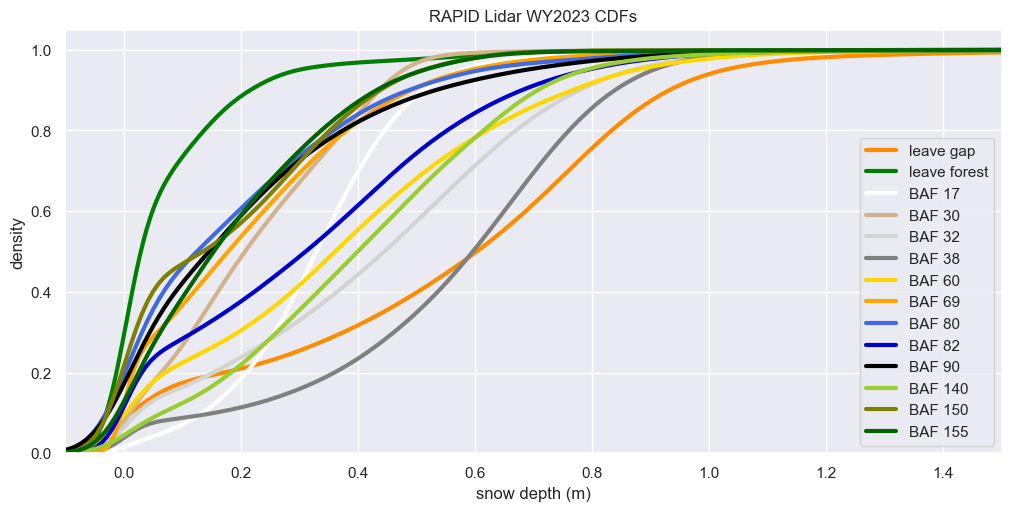

In [13]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(10,5), constrained_layout = True)

# plots 
sns.kdeplot(ds['hs_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_17'].values.flatten(), color='white', label='BAF 17', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_30'].values.flatten(), color='tan', label='BAF 30', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_32'].values.flatten(), color='lightgrey', label='BAF 32', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_38'].values.flatten(), color='grey', label='BAF 38', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_60'].values.flatten(), color='gold', label='BAF 60', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_69'].values.flatten(), color='orange', label='BAF 69', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_80'].values.flatten(), color='royalblue', label='BAF 80', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_82'].values.flatten(), color='mediumblue', label='BAF 82', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_90'].values.flatten(), color='black', label='BAF 90', cumulative=True, linewidth=3)
# sns.kdeplot(ds['hs_rapid_baf_new_92'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_140'].values.flatten(), color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_150'].values.flatten(), color='olive', label='BAF 150', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_155'].values.flatten(), color='darkgreen', label='BAF 155', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023 CDFs')
plt.xlabel('snow depth (m)')
plt.ylabel('density')
plt.xlim(-0.1,1.5)

plt.legend()
plt.show()

In [14]:
# ds['hs_rapid_baf_new_17_n'] = ds['hs_rapid_baf_new_17'].where(ds['baf_ridge'] == -1)
# ds['hs_rapid_baf_new_30_n'] = ds['hs_rapid_baf_new_30'].where(ds['baf_ridge'] == -1)

# ds['hs_rapid_baf_new_17_s'] = ds['hs_rapid_baf_new_17'].where(ds['baf_ridge'] == 1)
# ds['hs_rapid_baf_new_30_s'] = ds['hs_rapid_baf_new_30'].where(ds['baf_ridge'] == 1)

Now, do this but break this up by side of the ridge 
* the variables for this are created in `1_update_netcdf.ipynb`

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\1892715673.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['hs_rapid_baf_new_32_s'].values.flatten(), ax=axes[0], color='white', label=f'BAF 32, n={np.unique(ds["hs_rapid_baf_new_32_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\1892715673.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['hs_rapid_baf_new_38_s'].values.flatten(), ax=axes[0], color='lightgrey', label=f'BAF 38, n={np.unique(ds["hs_rapid_baf_new_38_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\1892715673.py:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['hs_rapid_baf_new_82_s'

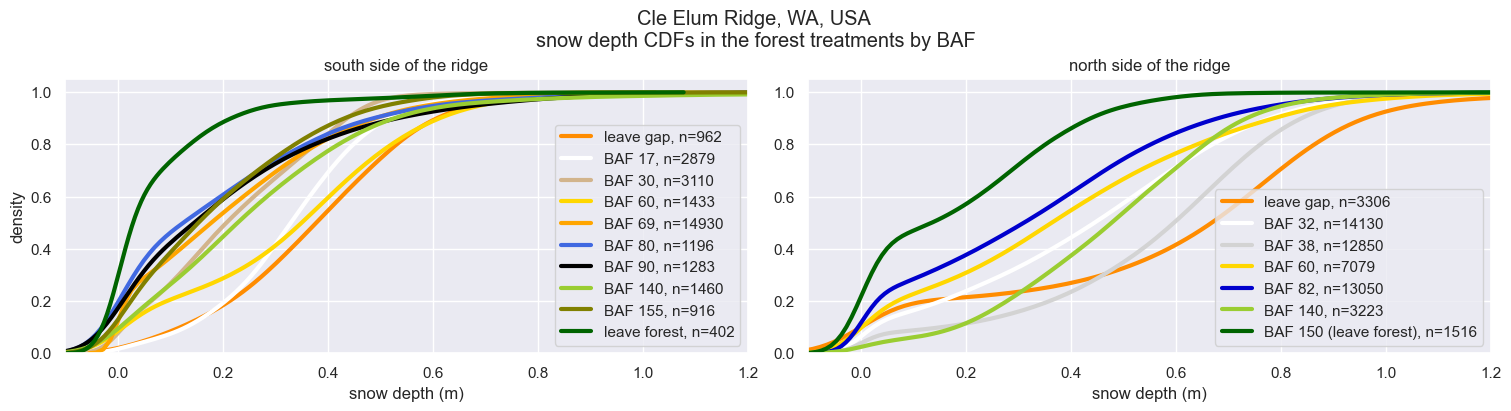

In [15]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
# SOUTH
sns.kdeplot(ds['hs_rapid_baf_new_1_s'].values.flatten(), ax=axes[0], color='darkorange', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_s'].values.flatten(), ax=axes[0], color='darkorange', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_2_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_17_s'].values.flatten(), ax=axes[0], color='white', label=f'BAF 17, n={np.unique(ds["hs_rapid_baf_new_17_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_30_s'].values.flatten(), ax=axes[0], color='tan', label=f'BAF 30, n={np.unique(ds["hs_rapid_baf_new_30_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_60_s'].values.flatten(), ax=axes[0], color='gold', label=f'BAF 60, n={np.unique(ds["hs_rapid_baf_new_60_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_s'].values.flatten(), ax=axes[0], color='orange', label=f'BAF 69, n={np.unique(ds["hs_rapid_baf_new_69_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_80_s'].values.flatten(), ax=axes[0], color='royalblue', label=f'BAF 80, n={np.unique(ds["hs_rapid_baf_new_80_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_90_s'].values.flatten(), ax=axes[0], color='black', label=f'BAF 90, n={np.unique(ds["hs_rapid_baf_new_90_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_140_s'].values.flatten(), ax=axes[0], color='yellowgreen', label=f'BAF 140, n={np.unique(ds["hs_rapid_baf_new_140_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_s'].values.flatten(), ax=axes[0], color='olive', label=f'BAF 155, n={np.unique(ds["hs_rapid_baf_new_155_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# NORTH
sns.kdeplot(ds['hs_rapid_baf_new_1_n'].values.flatten(), ax=axes[1], color='darkorange', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_n'].values.flatten(), ax=axes[1], color='green', label=f'leave forest, n={np.unique(ds["hs_rapid_baf_new_2_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_32_n'].values.flatten(), ax=axes[1], color='white', label=f'BAF 32, n={np.unique(ds["hs_rapid_baf_new_32_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_n'].values.flatten(), ax=axes[1], color='lightgrey', label=f'BAF 38, n={np.unique(ds["hs_rapid_baf_new_38_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_60_n'].values.flatten(), ax=axes[1], color='gold', label=f'BAF 60, n={np.unique(ds["hs_rapid_baf_new_60_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_n'].values.flatten(), ax=axes[1], color='orange', label=f'BAF 69, n={np.unique(ds["hs_rapid_baf_new_69_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_n'].values.flatten(), ax=axes[1], color='mediumblue', label=f'BAF 82, n={np.unique(ds["hs_rapid_baf_new_82_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_140_n'].values.flatten(), ax=axes[1], color='yellowgreen', label=f'BAF 140, n={np.unique(ds["hs_rapid_baf_new_140_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_n'].values.flatten(), ax=axes[1], color='darkgreen', label=f'BAF 150 (leave forest), n={np.unique(ds["hs_rapid_baf_new_150_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_155_n'].values.flatten(), ax=axes[1], color='olive', label=f'BAF 155, n={np.unique(ds["hs_rapid_baf_new_155_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# labels
axes[0].set_title('south side of the ridge')
axes[1].set_title('north side of the ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.2)

plt.suptitle('Cle Elum Ridge, WA, USA \nsnow depth CDFs in the forest treatments by BAF')
axes[0].legend()
axes[1].legend()

plt.show()

Now, check this for the sensitivity for each side of the ridge 

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\153575013.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['hs_rapid_baf_new_32_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\153575013.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['hs_rapid_baf_new_38_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\153575013.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['hs_rapid_baf_new_82_s'].where(ds["dah_binary"] == numbe

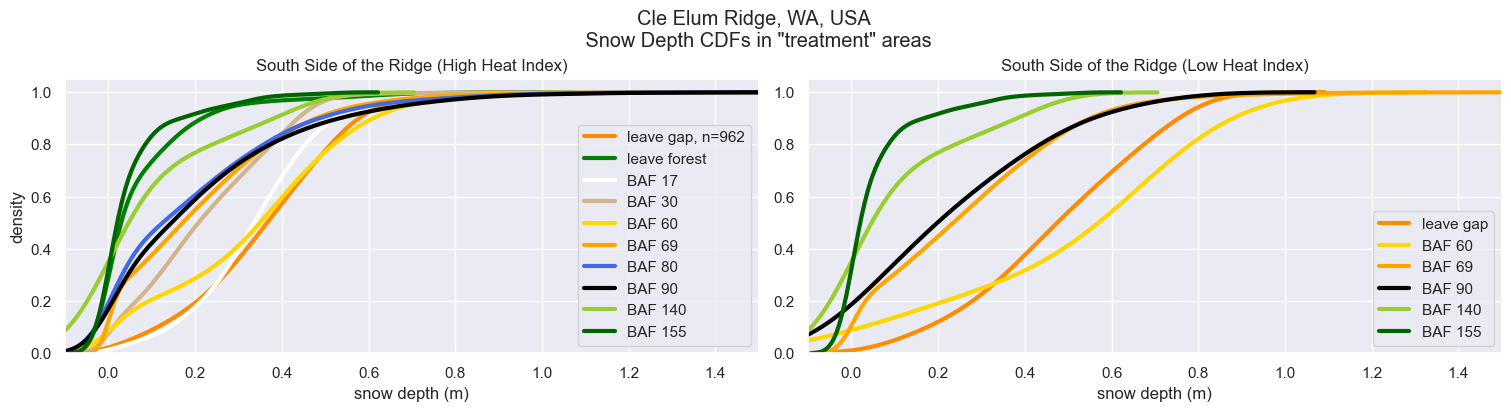

In [16]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 1 #high heat index
number2 = -1 #low heat index

# plots
# SOUTH
sns.kdeplot(ds['hs_rapid_baf_new_1_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='darkorange', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_17_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='white', label='BAF 17', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_30_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='tan', label='BAF 30', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_32_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_s'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='olive', label='BAF 150', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')

# NORTH
sns.kdeplot(ds['hs_rapid_baf_new_1_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='darkorange', label='leave gap', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_32_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='olive', label='BAF 150 (leave forest)', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_s'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')


# labels
axes[0].set_title('South Side of the Ridge (High Heat Index)')
axes[1].set_title('South Side of the Ridge (Low Heat Index)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in "treatment" areas')
axes[0].legend()
axes[1].legend()

plt.show()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\494676952.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['hs_rapid_baf_new_1_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='darkorange', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\494676952.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds['hs_rapid_baf_new_2_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')
C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\494676952.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ds

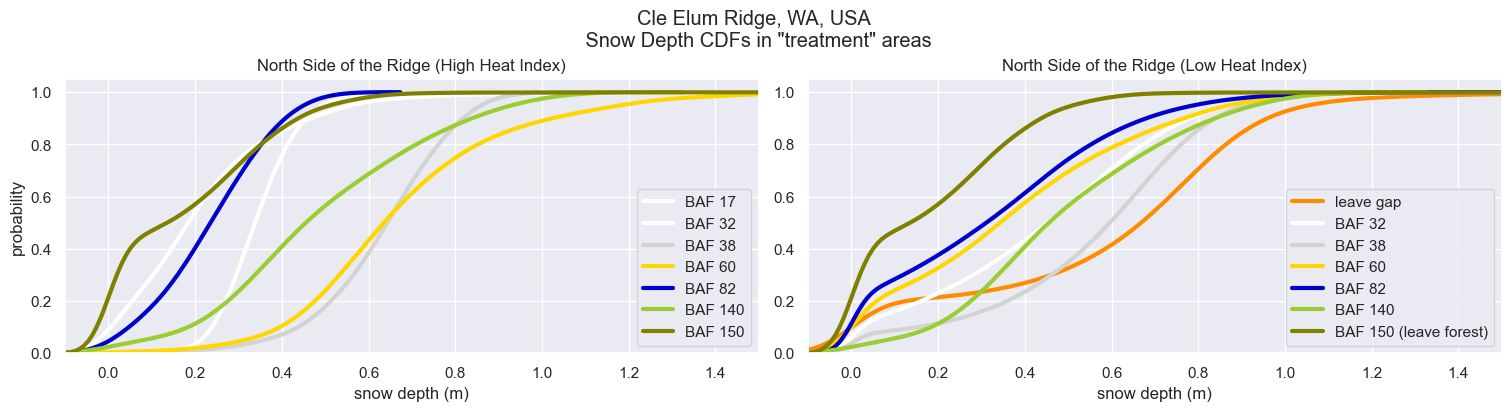

In [17]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

number1 = 1 #high heat index
number2 = -1 #low heat index

# plots
# SOUTH
sns.kdeplot(ds['hs_rapid_baf_new_1_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='darkorange', label=f'leave gap, n={np.unique(ds["hs_rapid_baf_new_1_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_17_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='white', label='BAF 17', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_30_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='tan', label='BAF 30', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_32_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_n'].where(ds["dah_binary"] == number1).values.flatten(), ax=axes[0], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='olive', label='BAF 150', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[0], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')

# NORTH
sns.kdeplot(ds['hs_rapid_baf_new_1_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='darkorange', label='leave gap', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_2_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='green', label='leave forest', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_32_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='white', label='BAF 32', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_38_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='lightgrey', label='BAF 38', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_60_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='gold', label='BAF 60', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_69_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='orange', label='BAF 69', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_80_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='royalblue', label='BAF 80', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_82_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='mediumblue', label='BAF 82', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_90_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='black', label='BAF 90', cumulative=True, linewidth=3, linestyle='solid')
# sns.kdeplot(ds['hs_rapid_baf_new_92_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3, linestyle='solid')

sns.kdeplot(ds['hs_rapid_baf_new_140_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_150_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='olive', label='BAF 150 (leave forest)', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_155_n'].where(ds["dah_binary"] == number2).values.flatten(), ax=axes[1], color='darkgreen', label='BAF 155', cumulative=True, linewidth=3, linestyle='solid')


# labels
axes[0].set_title('North Side of the Ridge (High Heat Index)')
axes[1].set_title('North Side of the Ridge (Low Heat Index)')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.5)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in "treatment" areas')
axes[0].legend()
axes[1].legend()

plt.show()

# Calculate the % Canopy Cover Metric

In [18]:
# Initialize the DataFrame
df = pd.DataFrame(columns=['BAF', 'canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'])
df['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    canopy_threshold = 2

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover_2m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 3

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover_3m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 4 meters 
    canopy_threshold = 4

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover_4m'] = percentage_canopy_cover.values.astype(int)
    

# Print the DataFrame
print(df)

    BAF canopy_cover_2m canopy_cover_3m canopy_cover_4m
0     1              64              55              47
1     2              95              93              91
2    17              29              23              18
3    30              34              30              27
4    32              59              53              49
5    38              45              42              39
6    60              51              48              45
7    69              56              53              50
8    80              53              47              44
9    82              65              62              58
10   90              58              56              54
11  140              67              64              60
12  150              99              99              98
13  155              91              89              87


In [19]:
df.dtypes

BAF                 int64
canopy_cover_2m    object
canopy_cover_3m    object
canopy_cover_4m    object
dtype: object

In [20]:
# change the type to integer for all columns 
df = df.astype(int)

In [21]:
df.canopy_cover_2m.dtype

dtype('int32')

In [22]:
df.dtypes

BAF                int32
canopy_cover_2m    int32
canopy_cover_3m    int32
canopy_cover_4m    int32
dtype: object

In [23]:
df

,BAF,canopy_cover_2m,canopy_cover_3m,canopy_cover_4m
0,1,64,55,47
1,2,95,93,91
2,17,29,23,18
3,30,34,30,27
4,32,59,53,49
5,38,45,42,39
6,60,51,48,45
7,69,56,53,50
8,80,53,47,44
9,82,65,62,58


Text(0.5, 1.0, 'threshold for 2m')

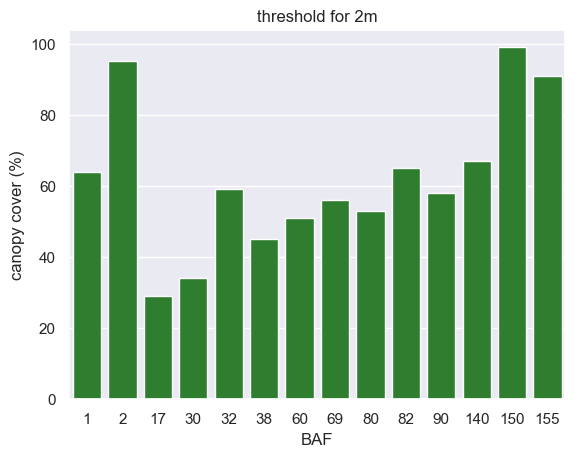

In [24]:
# Now, plot these to compare. 
sns.barplot(data=df, x='BAF', y='canopy_cover_2m', color='forestgreen', label='2m')
plt.ylabel('canopy cover (%)')
plt.title('threshold for 2m')

In [25]:
# create a version of this dataframe, df2, which uses a variable hue to show the different canopy cover values
df2 = pd.melt(df, id_vars=['BAF'], value_vars=['canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'], var_name='threshold', value_name='canopy_cover')

In [26]:
df2.head()

,BAF,threshold,canopy_cover
0,1,canopy_cover_2m,64
1,2,canopy_cover_2m,95
2,17,canopy_cover_2m,29
3,30,canopy_cover_2m,34
4,32,canopy_cover_2m,59


Text(0.5, 1.0, 'percentage of canopy cover in each treatment (with 2m, 3m, and 4m canopy height thresholds)')

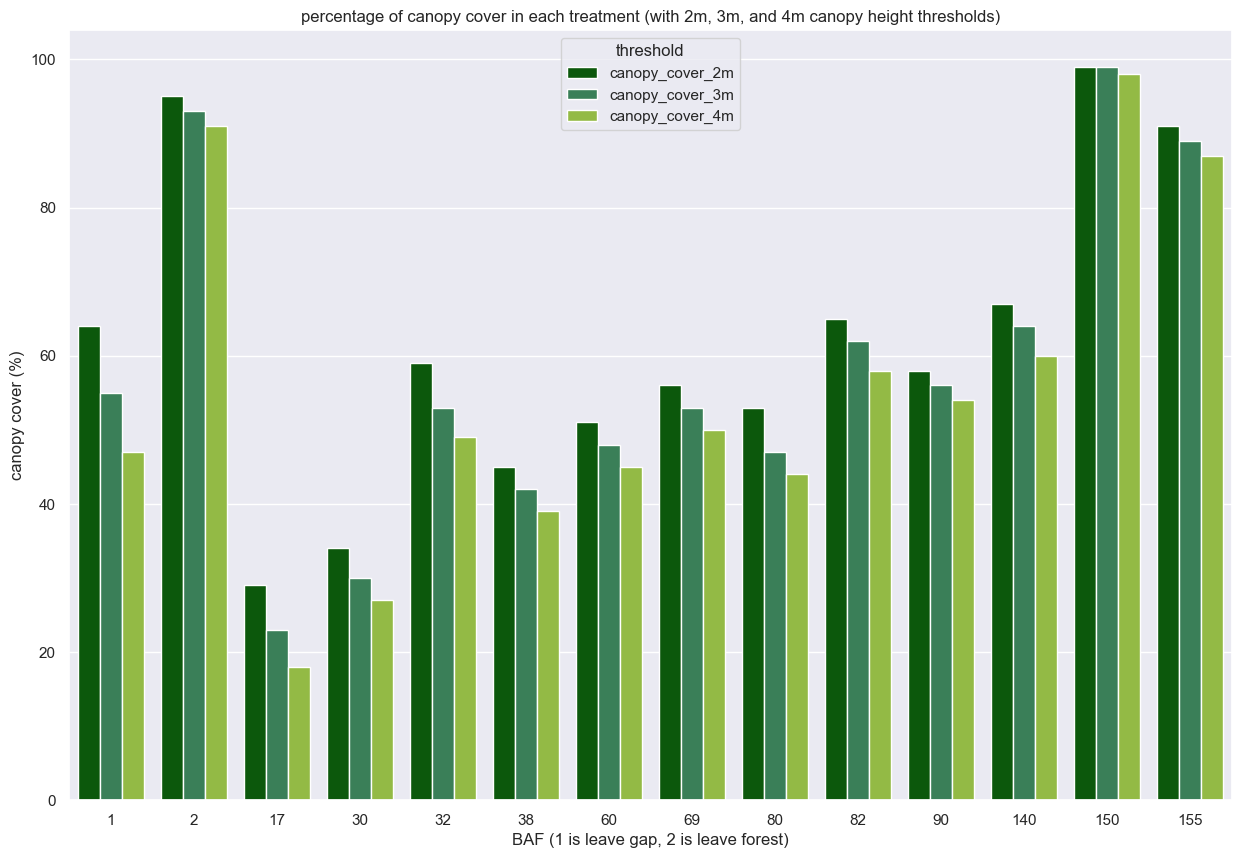

In [27]:
# increase figure size
fig = plt.figure(figsize=(15, 10))
color='forestgreen'
palette=['darkgreen', 'seagreen', 'yellowgreen']

# sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', color='green')

sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('canopy cover (%)')
plt.title('percentage of canopy cover in each treatment (with 2m, 3m, and 4m canopy height thresholds)')

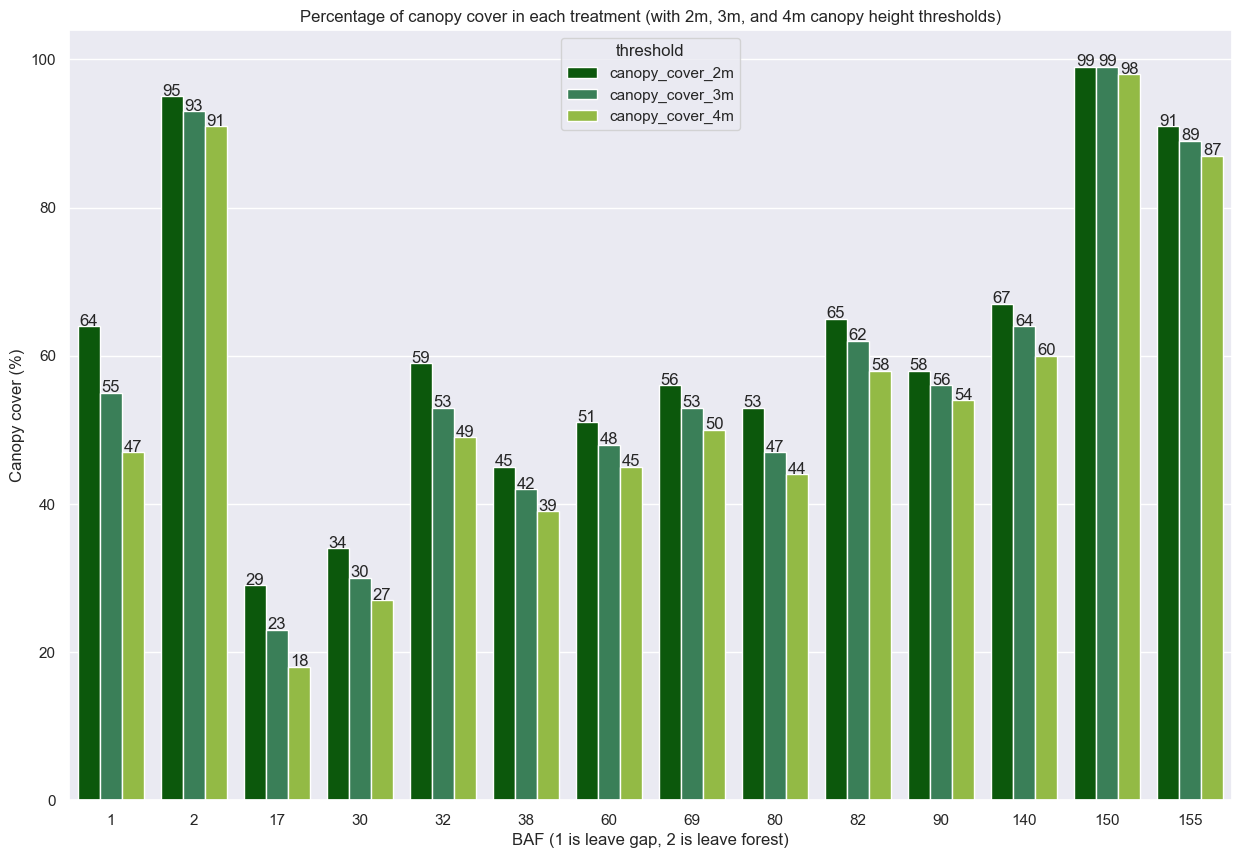

In [28]:
fig = plt.figure(figsize=(15, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment (with 2m, 3m, and 4m'
          ' canopy height thresholds)')

plt.show()

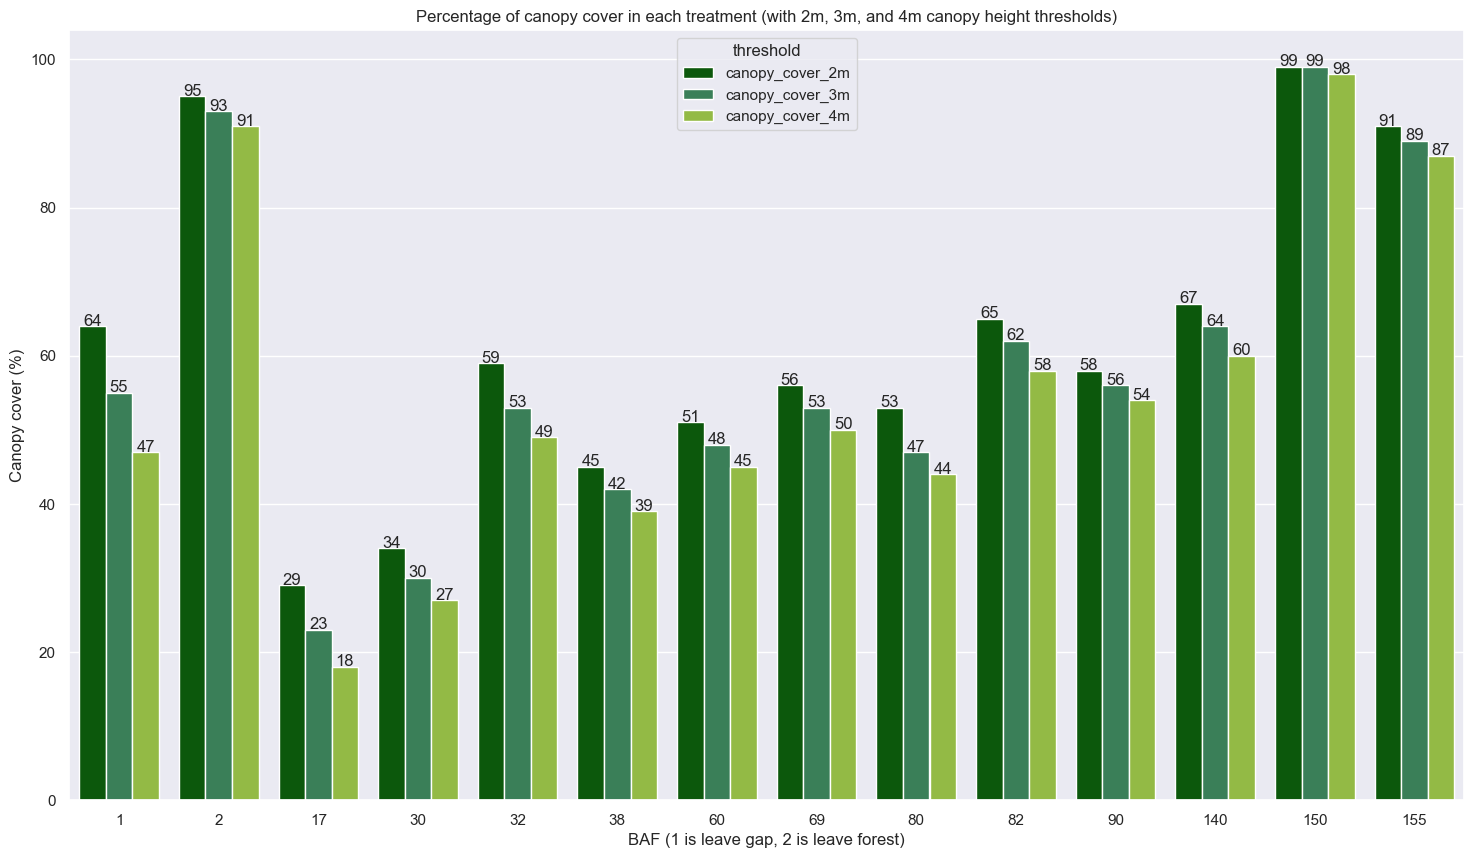

In [29]:
fig = plt.figure(figsize=(18, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment (with 2m, 3m, and 4m'
          ' canopy height thresholds)')

plt.show()

## Now, we want to get % canopy cover for before the treatments too

In [30]:
# Initialize the DataFrame
df_pre = pd.DataFrame(columns=['BAF', 'canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'])
df_pre['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df_pre.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    canopy_threshold = 2

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover_2m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 3

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover_3m'] = percentage_canopy_cover.values.astype(int)
    
    # Now, do the same thing for a canopy threshold of 4 meters 
    canopy_threshold = 4

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf_new'].where(ds['baf_new'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = (total_canopy_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover_4m'] = percentage_canopy_cover.values.astype(int)
    

# Print the DataFrame
print(df_pre)

    BAF canopy_cover_2m canopy_cover_3m canopy_cover_4m
0     1              55              40              26
1     2              98              95              93
2    17              40              23              13
3    30              34              27              24
4    32              95              93              90
5    38              95              93              92
6    60              83              78              75
7    69              80              74              70
8    80              98              95              90
9    82              90              87              84
10   90              98              96              94
11  140              75              70              65
12  150              99              99              99
13  155              93              88              86


In [31]:
# change the type to integer for all columns 
df_pre = df_pre.astype(int)

# create a version of this dataframe, df2, which uses a variable hue to show the different canopy cover values
df2_pre = pd.melt(df_pre, id_vars=['BAF'], value_vars=['canopy_cover_2m', 'canopy_cover_3m', 'canopy_cover_4m'], var_name='threshold', value_name='canopy_cover')

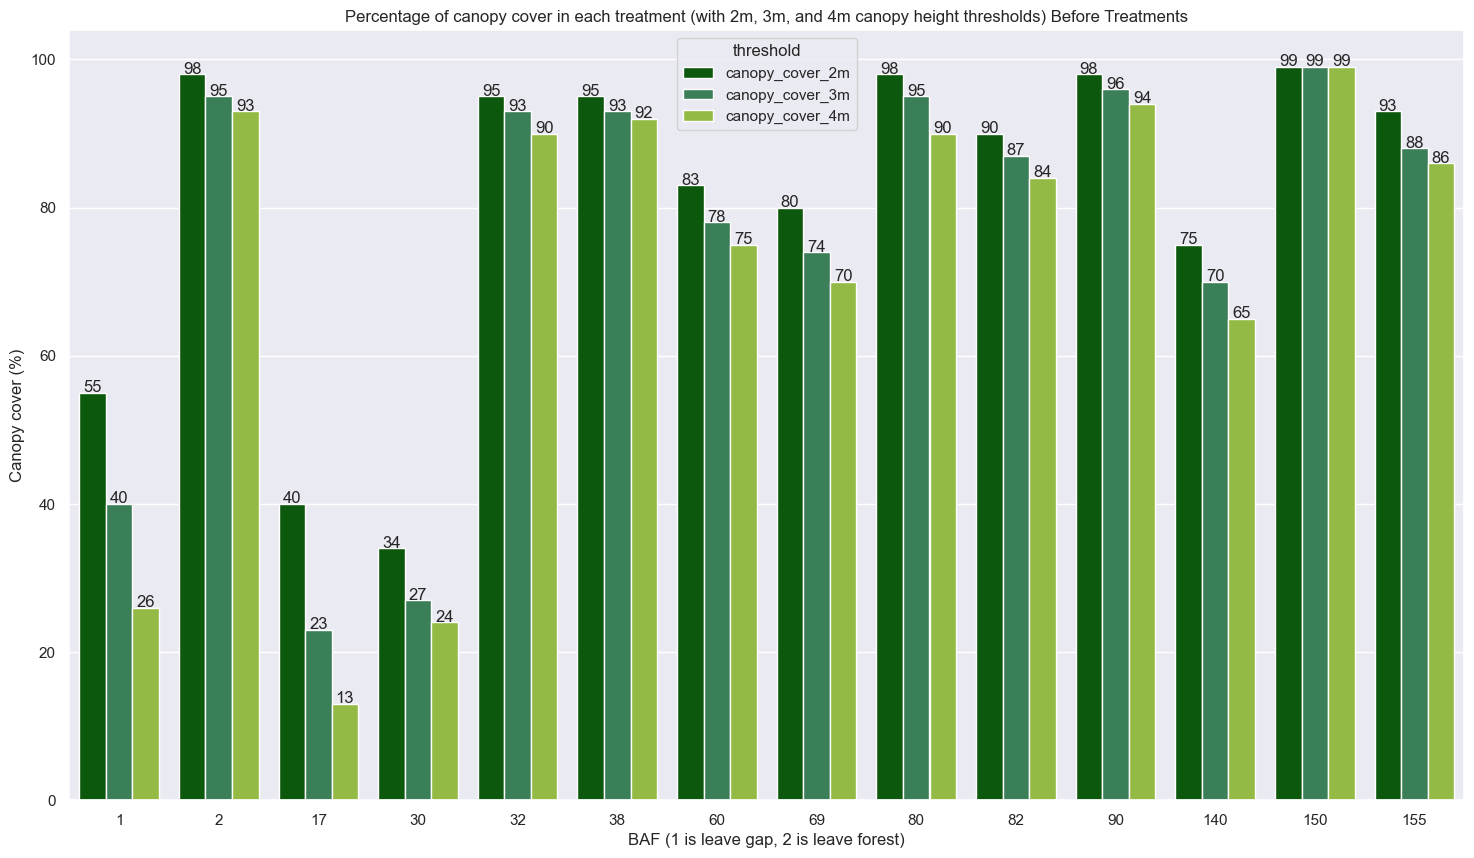

In [32]:
fig = plt.figure(figsize=(18, 10))
color = 'forestgreen'
palette = ['darkgreen', 'seagreen', 'yellowgreen']

# Create a barplot with values
barplot = sns.barplot(data=df2_pre, x='BAF', y='canopy_cover', hue='threshold', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF (1 is leave gap, 2 is leave forest)')
plt.ylabel('Canopy cover (%)')
plt.title('Percentage of canopy cover in each treatment (with 2m, 3m, and 4m'
          ' canopy height thresholds) Before Treatments')

plt.show()

Now, merge the df2 and df2_pre with only the 2m threshold to then compare on one plot

In [33]:
# for both datasets, only save for 2m threshold 
df2_pre = df2_pre[df2_pre['threshold'] == 'canopy_cover_2m']
df2_pos = df2[df2['threshold'] == 'canopy_cover_2m']

In [34]:
# Now merge df2_pos and df2_pre and create a new column to determine pre and pos 
df2_pre['treatment'] = 'pre'
df2_pos['treatment'] = 'post'

df2_all = pd.concat([df2_pre, df2_pos])
df2_all.head()

C:\Users\Lumbr\AppData\Local\Temp\ipykernel_29408\4030389355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_pos['treatment'] = 'post'


,BAF,threshold,canopy_cover,treatment
0,1,canopy_cover_2m,55,pre
1,2,canopy_cover_2m,98,pre
2,17,canopy_cover_2m,40,pre
3,30,canopy_cover_2m,34,pre
4,32,canopy_cover_2m,95,pre


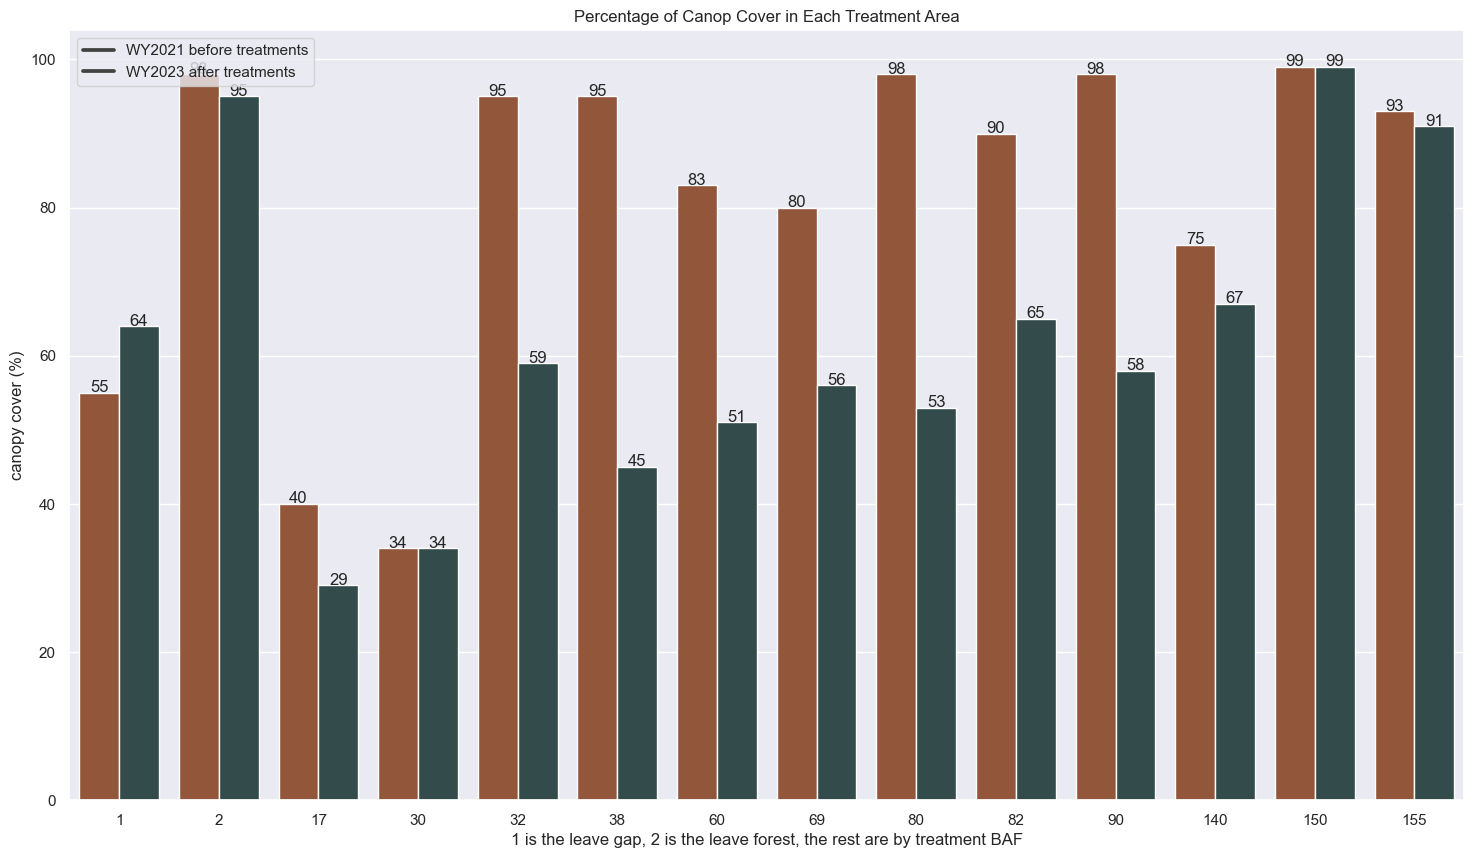

In [35]:
fig = plt.figure(figsize=(18, 10))
colorpre='sienna'
colorpos='darkslategrey'
palette = [colorpre, colorpos]

# Create a barplot with values
barplot = sns.barplot(data=df2_all, x='BAF', y='canopy_cover', hue='treatment', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('1 is the leave gap, 2 is the leave forest, the rest are by treatment BAF')
plt.ylabel('canopy cover (%)')
plt.title('Percentage of Canop Cover in Each Treatment Area')
plt.legend(['WY2021 before treatments', 'WY2023 after treatments'], loc='upper left')

plt.show()

## Now, group the previous CDFs by the % of canopy cover

In [36]:
# define groups 
# low canopy cover, BAF 17, 30
# medium canopy cover, leave gap (1) BAF 32, 38, 60, 69, 80, 82, 90, 140 
# high canopy cover, BAF 150, 155, leave forest (2)

In [37]:
# first, copy the baf_new variable
ds['baf_grouped_canopycover'] = ds['baf_new'].copy(deep=True)

# now, add BAF 17 and 30 to the low coverage group
ds['baf_grouped_canopycover'] = ds['baf_grouped_canopycover'].where(~((ds['baf_new'] == 17) | (ds['baf_new'] == 30)), 30) # ~30 % canopy cover

# now, add BAF 32, 38, 60, 69, 80, 82, 90, 140, and 1 (leave gap) to the medium coverage group
ds['baf_grouped_canopycover'] = ds['baf_grouped_canopycover'].where(~((ds['baf_new'] == 38) | (ds['baf_new'] == 60) |
                                                                      (ds['baf_new'] == 69) | (ds['baf_new'] == 80) |
                                                                      (ds['baf_new'] == 82) | (ds['baf_new'] == 90) |
                                                                      (ds['baf_new'] == 140)| (ds['baf_new'] == 1 )), 60) # ~60 % canopy cover

# and add BAF 150, 155, and 2 (leave forest) to the high coverage group
ds['baf_grouped_canopycover'] = ds['baf_grouped_canopycover'].where(~((ds['baf_new'] == 2 ) | (ds['baf_new'] == 150)| (ds['baf_new'] == 155)), 90) # ~90 % canopy cover

# if you want to save the group with dce 
ds['dce_rapid_baf_new_30s_canopycover'] = ds['dce_rapid'].where(ds['baf_grouped_canopycover'] == 30)
ds['dce_rapid_baf_new_60s_canopycover'] = ds['dce_rapid'].where(ds['baf_grouped_canopycover'] == 60)
ds['dce_rapid_baf_new_90s_canopycover'] = ds['dce_rapid'].where(ds['baf_grouped_canopycover'] == 90)

# do the same thing with snow depth 
ds['hs_rapid_baf_new_30s_canopycover'] = ds['hs_rapid'].where(ds['baf_grouped_canopycover'] == 30)
ds['hs_rapid_baf_new_60s_canopycover'] = ds['hs_rapid'].where(ds['baf_grouped_canopycover'] == 60)
ds['hs_rapid_baf_new_90s_canopycover'] = ds['hs_rapid'].where(ds['baf_grouped_canopycover'] == 90)

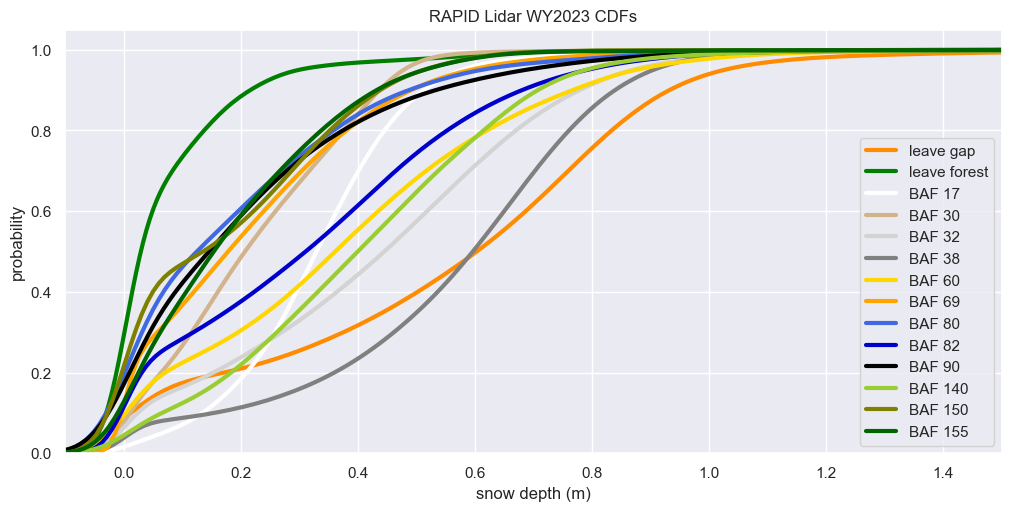

In [38]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(10,5), constrained_layout = True)

# plots 
sns.kdeplot(ds['hs_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_17'].values.flatten(), color='white', label='BAF 17', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_30'].values.flatten(), color='tan', label='BAF 30', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_32'].values.flatten(), color='lightgrey', label='BAF 32', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_38'].values.flatten(), color='grey', label='BAF 38', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_60'].values.flatten(), color='gold', label='BAF 60', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_69'].values.flatten(), color='orange', label='BAF 69', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_80'].values.flatten(), color='royalblue', label='BAF 80', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_82'].values.flatten(), color='mediumblue', label='BAF 82', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_90'].values.flatten(), color='black', label='BAF 90', cumulative=True, linewidth=3)
# sns.kdeplot(ds['hs_rapid_baf_new_92'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_140'].values.flatten(), color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_150'].values.flatten(), color='olive', label='BAF 150', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_155'].values.flatten(), color='darkgreen', label='BAF 155', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023 CDFs')
plt.xlabel('snow depth (m)')
plt.ylabel('probability')
plt.xlim(-0.1,1.5)

plt.legend()
plt.show()

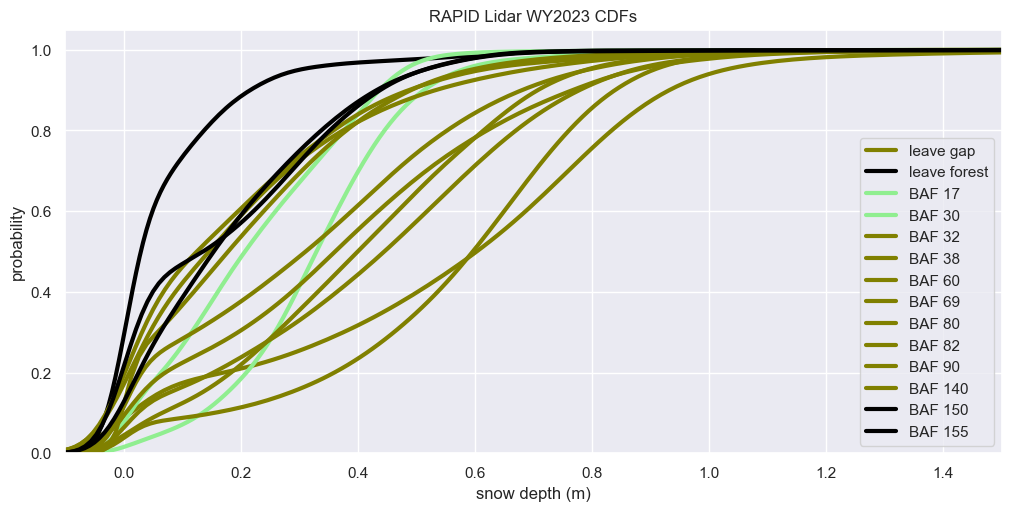

In [39]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(10,5), constrained_layout = True)

colorlow = 'lightgreen'
colormed = 'olive'
colorhigh = 'black'

# plots 
sns.kdeplot(ds['hs_rapid_baf_new_1'].values.flatten(), color=colormed, label='leave gap', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_2'].values.flatten(), color=colorhigh, label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_17'].values.flatten(), color=colorlow, label='BAF 17', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_30'].values.flatten(), color=colorlow, label='BAF 30', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_32'].values.flatten(), color=colormed, label='BAF 32', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_38'].values.flatten(), color=colormed, label='BAF 38', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_60'].values.flatten(), color=colormed, label='BAF 60', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_69'].values.flatten(), color=colormed, label='BAF 69', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_80'].values.flatten(), color=colormed, label='BAF 80', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_82'].values.flatten(), color=colormed, label='BAF 82', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_90'].values.flatten(), color=colormed, label='BAF 90', cumulative=True, linewidth=3)
# sns.kdeplot(ds['hs_rapid_baf_new_92'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_140'].values.flatten(), color=colormed, label='BAF 140', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_150'].values.flatten(), color=colorhigh, label='BAF 150', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_155'].values.flatten(), color=colorhigh, label='BAF 155', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023 CDFs')
plt.xlabel('snow depth (m)')
plt.ylabel('probability')
plt.xlim(-0.1,1.5)

plt.legend()
plt.show()

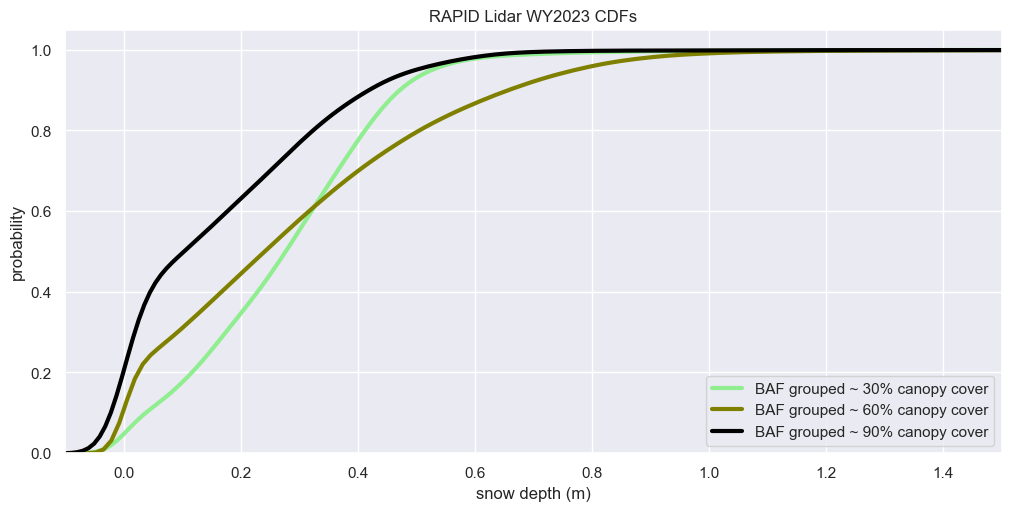

In [40]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(10,5), constrained_layout = True)

colorlow = 'lightgreen'
colormed = 'olive'
colorhigh = 'black'

# plots 
sns.kdeplot(ds['hs_rapid_baf_new_30s_canopycover'].values.flatten(), color=colorlow,  label='BAF grouped ~ 30% canopy cover', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_60s_canopycover'].values.flatten(), color=colormed,  label='BAF grouped ~ 60% canopy cover', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_90s_canopycover'].values.flatten(), color=colorhigh, label='BAF grouped ~ 90% canopy cover', cumulative=True, linewidth=3)

# labels
plt.title('RAPID Lidar WY2023 CDFs')
plt.xlabel('snow depth (m)')
plt.ylabel('probability')
plt.xlim(-0.1,1.5)

plt.legend()
plt.show()

Now, create variables for the side of the ridge and the heat index. 

In [41]:
ds['hs_rapid_baf_new_30s_canopycover_n'] = ds['hs_rapid_baf_new_30s_canopycover'].where(ds['baf_ridge'] == -1)
ds['hs_rapid_baf_new_60s_canopycover_n'] = ds['hs_rapid_baf_new_60s_canopycover'].where(ds['baf_ridge'] == -1)
ds['hs_rapid_baf_new_90s_canopycover_n'] = ds['hs_rapid_baf_new_90s_canopycover'].where(ds['baf_ridge'] == -1)

ds['hs_rapid_baf_new_30s_canopycover_s'] = ds['hs_rapid_baf_new_30s_canopycover'].where(ds['baf_ridge'] == 1)
ds['hs_rapid_baf_new_60s_canopycover_s'] = ds['hs_rapid_baf_new_60s_canopycover'].where(ds['baf_ridge'] == 1)
ds['hs_rapid_baf_new_90s_canopycover_s'] = ds['hs_rapid_baf_new_90s_canopycover'].where(ds['baf_ridge'] == 1)

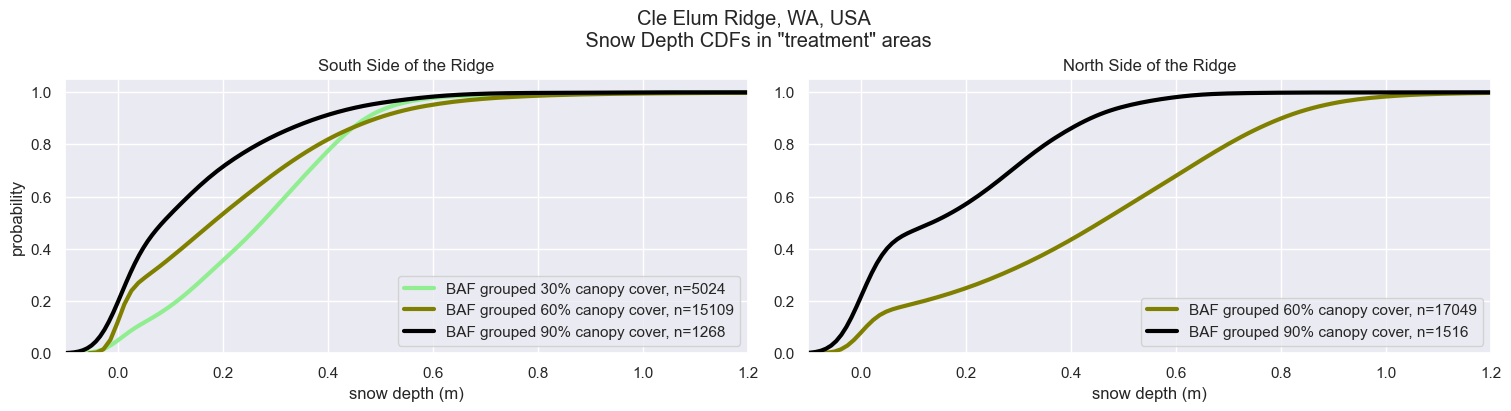

In [42]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
# SOUTH
sns.kdeplot(ds['hs_rapid_baf_new_30s_canopycover_s'].values.flatten(), ax=axes[0], color=colorlow,  label=f'BAF grouped 30% canopy cover, n={np.unique(ds["hs_rapid_baf_new_30s_canopycover_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_60s_canopycover_s'].values.flatten(), ax=axes[0], color=colormed,  label=f'BAF grouped 60% canopy cover, n={np.unique(ds["hs_rapid_baf_new_60s_canopycover_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_90s_canopycover_s'].values.flatten(), ax=axes[0], color=colorhigh, label=f'BAF grouped 90% canopy cover, n={np.unique(ds["hs_rapid_baf_new_90s_canopycover_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# NORTH
# sns.kdeplot(ds['hs_rapid_baf_new_30s_canopycover_n'].values.flatten(), ax=axes[1], color=colorlow,  label=f'BAF grouped 30% canopy cover, n={np.unique(ds["hs_rapid_baf_new_30s_canopycover_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_60s_canopycover_n'].values.flatten(), ax=axes[1], color=colormed,  label=f'BAF grouped 60% canopy cover, n={np.unique(ds["hs_rapid_baf_new_60s_canopycover_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_90s_canopycover_n'].values.flatten(), ax=axes[1], color=colorhigh, label=f'BAF grouped 90% canopy cover, n={np.unique(ds["hs_rapid_baf_new_90s_canopycover_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# labels
axes[0].set_title('South Side of the Ridge')
axes[1].set_title('North Side of the Ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.2)

plt.suptitle('Cle Elum Ridge, WA, USA \n Snow Depth CDFs in "treatment" areas')
axes[0].legend()
axes[1].legend()

plt.show()

For a figure... some changes to text

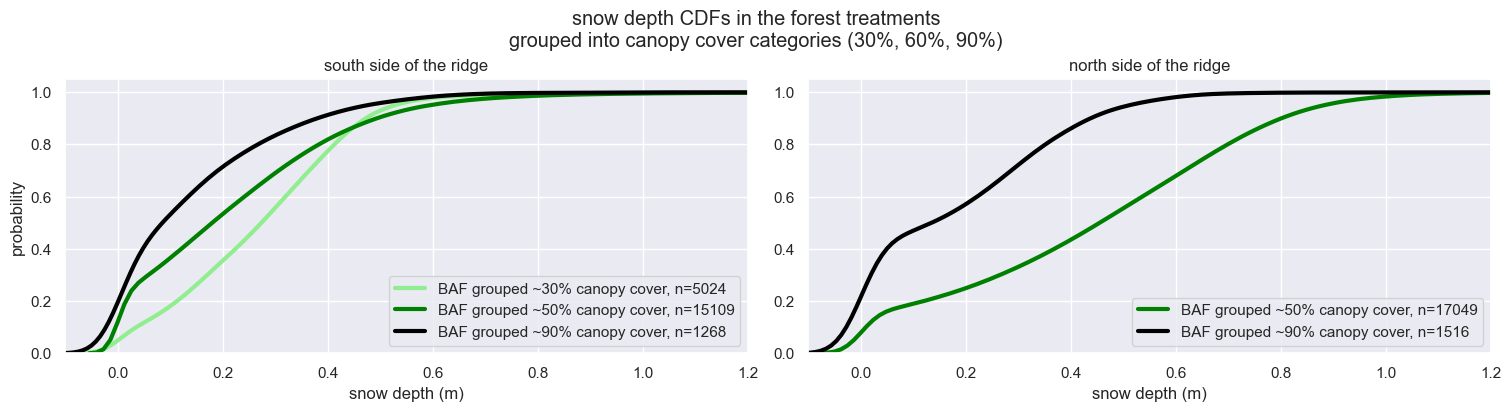

In [43]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(15,4), constrained_layout = True)
alpha=0.7

# plots
# SOUTH
sns.kdeplot(ds['hs_rapid_baf_new_30s_canopycover_s'].values.flatten(), ax=axes[0], color=colorlow,  label=f'BAF grouped ~30% canopy cover, n={np.unique(ds["hs_rapid_baf_new_30s_canopycover_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_60s_canopycover_s'].values.flatten(), ax=axes[0], color='green',  label=f'BAF grouped ~50% canopy cover, n={np.unique(ds["hs_rapid_baf_new_60s_canopycover_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_90s_canopycover_s'].values.flatten(), ax=axes[0], color=colorhigh, label=f'BAF grouped ~90% canopy cover, n={np.unique(ds["hs_rapid_baf_new_90s_canopycover_s"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# NORTH
# sns.kdeplot(ds['hs_rapid_baf_new_30s_canopycover_n'].values.flatten(), ax=axes[1], color=colorlow,  label=f'BAF grouped 30% canopy cover, n={np.unique(ds["hs_rapid_baf_new_30s_canopycover_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_60s_canopycover_n'].values.flatten(), ax=axes[1], color='green',  label=f'BAF grouped ~50% canopy cover, n={np.unique(ds["hs_rapid_baf_new_60s_canopycover_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')
sns.kdeplot(ds['hs_rapid_baf_new_90s_canopycover_n'].values.flatten(), ax=axes[1], color=colorhigh, label=f'BAF grouped ~90% canopy cover, n={np.unique(ds["hs_rapid_baf_new_90s_canopycover_n"]).size}', cumulative=True, linewidth=3, linestyle='solid')


# labels
axes[0].set_title('south side of the ridge')
axes[1].set_title('north side of the ridge')

axes[0].set_xlabel('snow depth (m)')
axes[1].set_xlabel('snow depth (m)')

axes[0].set_ylabel('probability')
axes[1].set_ylabel('')

axes[0].set_xlim(-0.1,1.2)

plt.suptitle('snow depth CDFs in the forest treatments\ngrouped into canopy cover categories (30%, 60%, 90%)')
axes[0].legend()
axes[1].legend()

plt.show()

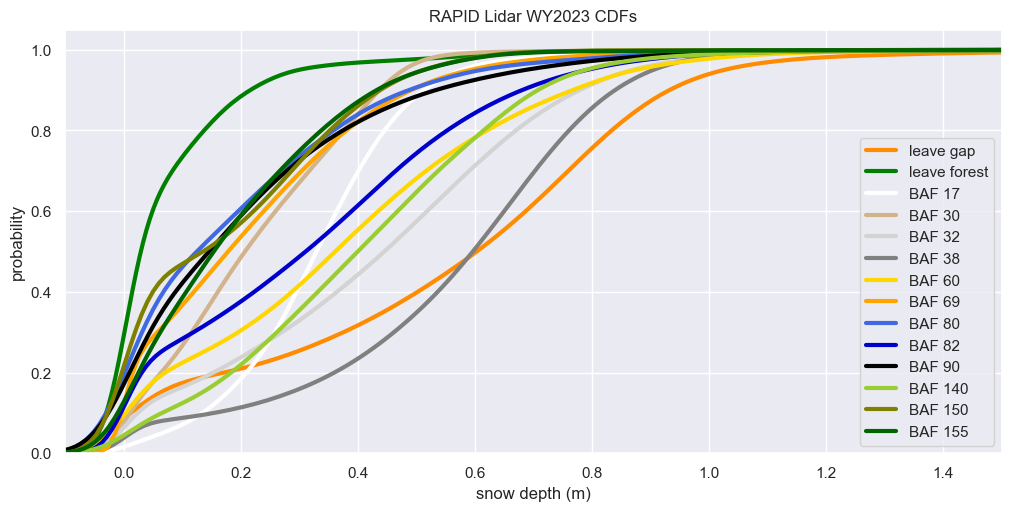

In [44]:
# plot of a histogram of all those variables 
fig, axes = plt.subplots(sharex=True, sharey=False, figsize=(10,5), constrained_layout = True)

# plots 
sns.kdeplot(ds['hs_rapid_baf_new_1'].values.flatten(), color='darkorange', label='leave gap', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_2'].values.flatten(), color='green', label='leave forest', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_17'].values.flatten(), color='white', label='BAF 17', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_30'].values.flatten(), color='tan', label='BAF 30', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_32'].values.flatten(), color='lightgrey', label='BAF 32', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_38'].values.flatten(), color='grey', label='BAF 38', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_60'].values.flatten(), color='gold', label='BAF 60', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_69'].values.flatten(), color='orange', label='BAF 69', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_80'].values.flatten(), color='royalblue', label='BAF 80', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_82'].values.flatten(), color='mediumblue', label='BAF 82', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_90'].values.flatten(), color='black', label='BAF 90', cumulative=True, linewidth=3)
# sns.kdeplot(ds['hs_rapid_baf_new_92'].values.flatten(), color='mediumblue', label='BAF 90s', cumulative=True, linewidth=3)

sns.kdeplot(ds['hs_rapid_baf_new_140'].values.flatten(), color='yellowgreen', label='BAF 140', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_150'].values.flatten(), color='olive', label='BAF 150', cumulative=True, linewidth=3)
sns.kdeplot(ds['hs_rapid_baf_new_155'].values.flatten(), color='darkgreen', label='BAF 155', cumulative=True, linewidth=3)


# labels
plt.title('RAPID Lidar WY2023 CDFs')
plt.xlabel('snow depth (m)')
plt.ylabel('probability')
plt.xlim(-0.1,1.5)

plt.legend()
plt.show()